# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 


## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?


### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
import librosa
import librosa.display
import IPython.display as ipd

In [435]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveplot(wav, sr=sr)

In [439]:
def init_audio_player(signal, sample_rate):
    # Отрисовка звукового сигнала во временной области
    player = ipd.Audio(signal, rate=sample_rate)
    ipd.display(player)
    draw_waveform(signal, sr=sample_rate)

Len is 172380 ( ). Sample rate is 16000


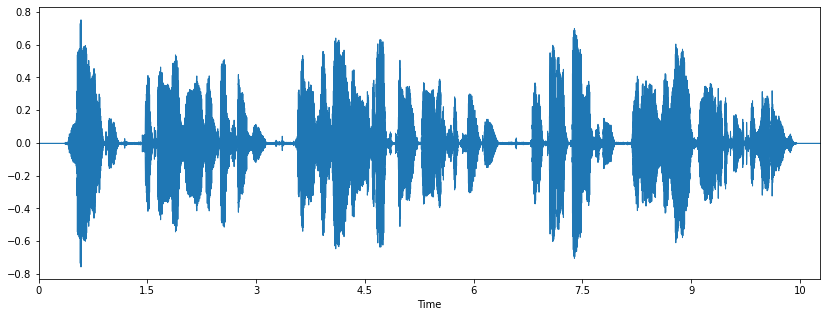

In [440]:
speech_sample, tw_sr = librosa.core.load("speech_sample/ru_m2.wav", sr=None)
print(f"Len is {len(speech_sample)} ( ). Sample rate is {tw_sr}")
init_audio_player(speech_sample, tw_sr)

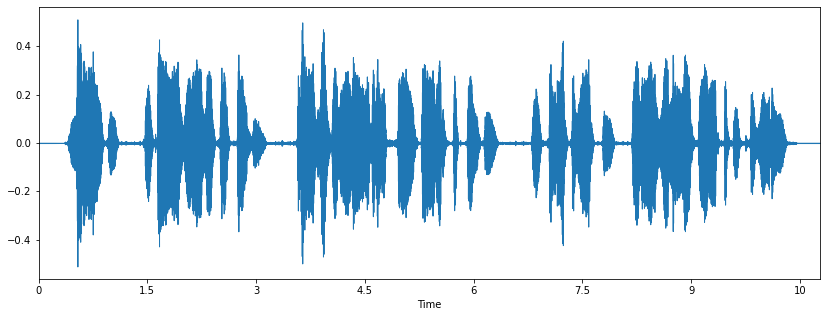

In [445]:
import scipy.signal

# New sampling rate
new_rate = 1000

number_of_samples = round(len(speech_sample) * float(new_rate) / tw_sr)
data = scipy.signal.resample(speech_sample, number_of_samples)
init_audio_player(data, new_rate)

1. В wav файле хранится заголовок со служебной информацией и сами данные (сэмплированные значения амплитуды сигнала). Информация о дискретизации лежит в заголовке.
2. В исходном файле частота была 16000 Гц. Речь становится неразличима при пересемплировании до 1000 Гц. 
3. WAV - без сжатия, MP3 OGG - со сжатием с потерями.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [3]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [4]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

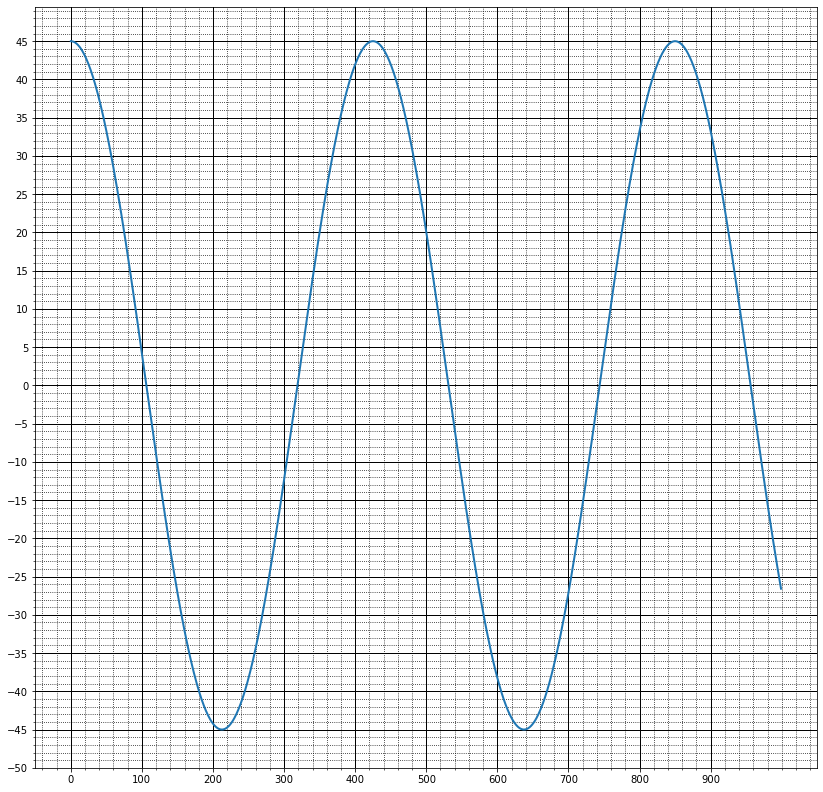

In [5]:
draw_signal(test_data['task2']['a'])

In [478]:
def drawSignalDifference(signal_a, signal_b):
    plt.figure()
    plt.plot(signal_a)
    plt.plot(signal_b, '--')
    plt.xlim([0, 1000])
    plt.grid()

In [479]:
# YOUR CODE HERE
x=np.arange(0, 1000)
omega = 2 * np.pi / 425
phi = 0
a = 45 * np.cos(omega * x + phi)

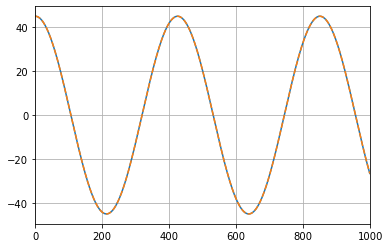

In [480]:
drawSignalDifference(test_data['task2']['a'], a)

In [481]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


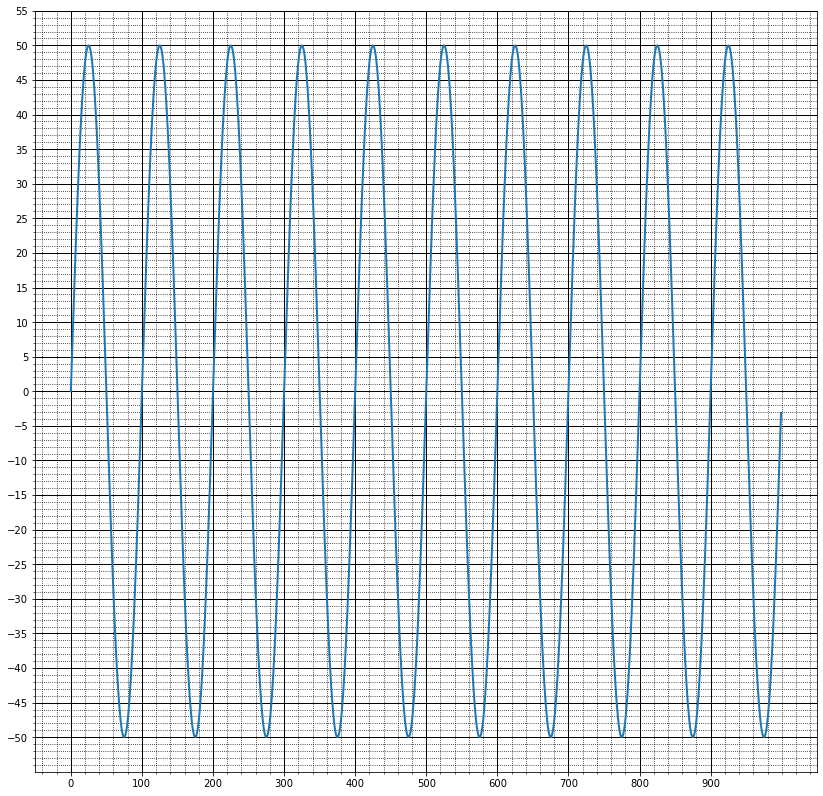

In [482]:
draw_signal(test_data['task2']['b'])

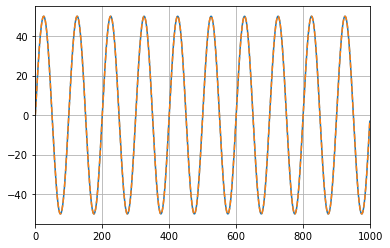

In [483]:
# YOUR CODE HERE
x=np.arange(0, 1000)
omega = 2 * np.pi / 100
phi = 0
b = 50 * np.sin(omega * x + phi)
drawSignalDifference(test_data['task2']['b'], b)

In [484]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


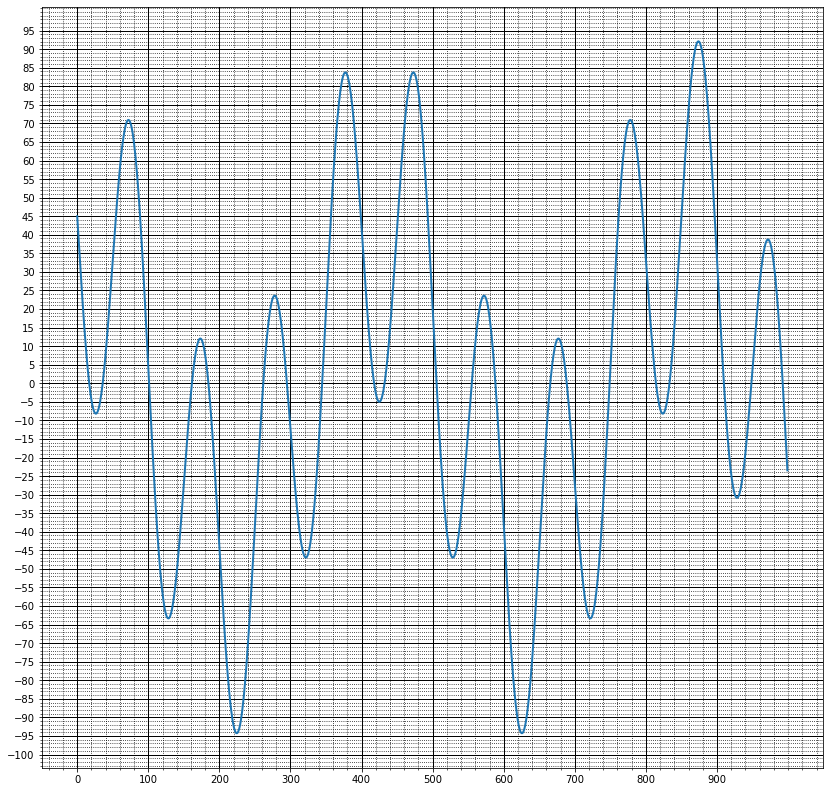

In [485]:
draw_signal(test_data['task2']['c'])

([<matplotlib.axis.XTick at 0x1f78979a630>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

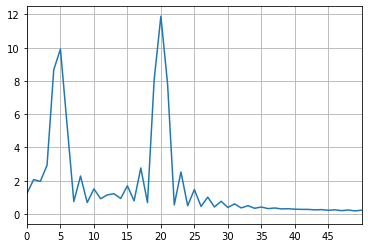

In [486]:
# %matplotlib inline
N = len(test_data['task2']['c'])
spectrum = np.fft.fft(test_data['task2']['c'])
spectrum = np.fft.ifft(test_data['task2']['c'], 2 * N)
spectrum = abs(np.fft.fftshift(spectrum))
z = np.arange(-((2 * N)) / 2, (2 * N - 1) / 2, 1)
plt.figure()
plt.plot(z, spectrum)
plt.xlim([0, 50])
plt.grid()
plt.xticks(np.arange(0, 50, 5))

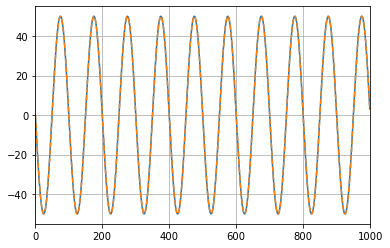

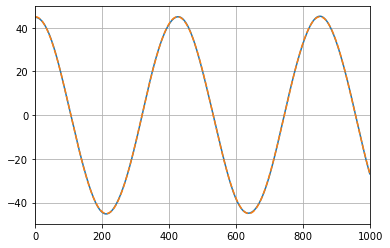

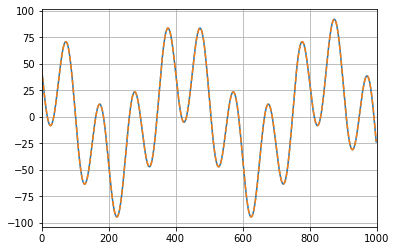

In [487]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
x=np.arange(0, 1000)
omega1 = 2 * np.pi / (425)
phi1 = 0

c1 = 45 * np.cos(omega1 * x + phi1)


omega2 = 2 * np.pi / 100
phi2 = -29.85
c2 = 50 * np.cos(omega2 * x + phi2)


c = c1 + c2


drawSignalDifference(test_data['task2']['c'] - c1, c2)
drawSignalDifference(test_data['task2']['c'] - c2, c1)
drawSignalDifference(test_data['task2']['c'], c)

In [488]:
np.allclose(c, test_data["task2"]["c"], atol=1)

True

In [490]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [368]:
import scipy

In [418]:
def convolve(in1, in2):
    #YOUR CODE HERE    
    n = len(in1) #signal
    m = len(in2) #kernel
    outputSize = n + m - 1
    res = np.zeros(outputSize)
    for i in range(outputSize):
        for j in range(m):
            if (i - j < n):
                res[i] += in1[i - j] * in2[j]
    
    return res

In [419]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [420]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

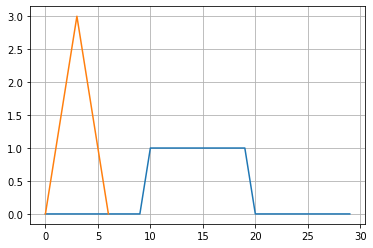

In [421]:
plt.figure()
plt.plot(a)
plt.plot(b)
plt.grid()

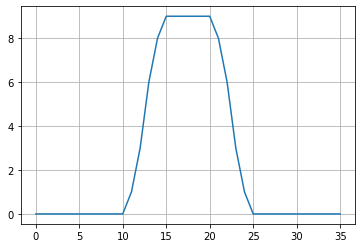

In [422]:
# Нарисуйте результат свертки a и b
# YOUR CODE HERE
plt.figure()
plt.plot(convolve(a, b))
plt.grid()

In [423]:
test_convolve(a, b, print_debug=False)

Ok!


## Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [432]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

    samples = np.zeros(N)
    samples[:len(noise)] = noise
    
    for i in range(len(noise), N):
        samples[i] = (samples[i - len(noise)] + samples[i - len(noise) - 1])/2
    return samples
    #
#     raise NotImplementedError()

In [433]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


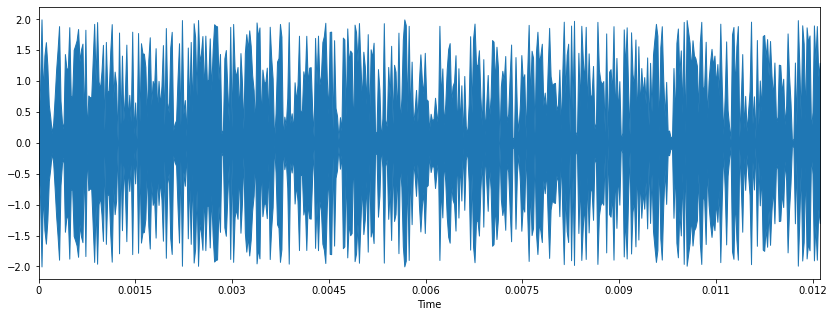

In [446]:
init_audio_player(noise, sample_rate)

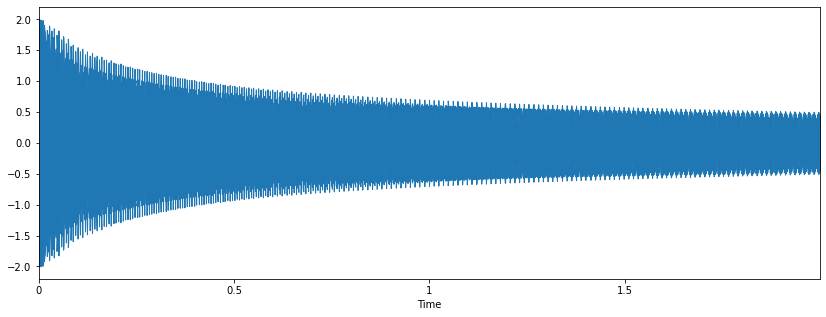

In [448]:
init_audio_player(gen_wav, sample_rate)

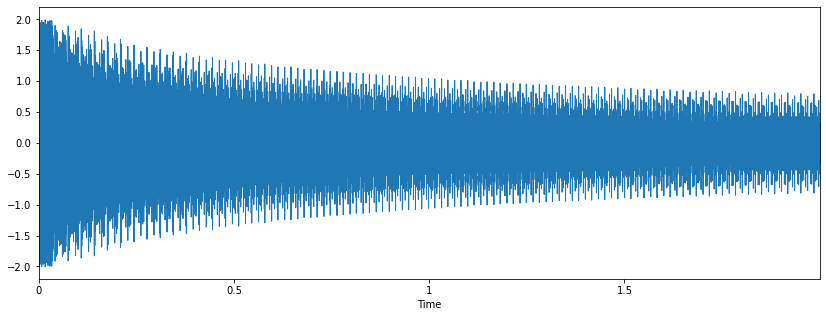

In [452]:
# Попробуйте покрутить параметры генерации. 
# YOUR CODE HERE
sample_rate1 = 16000
gen_len1 = sample_rate1 * sec
gen_wav1 = karplus_strong(noise, gen_len1)
init_audio_player(gen_wav1, sample_rate1)

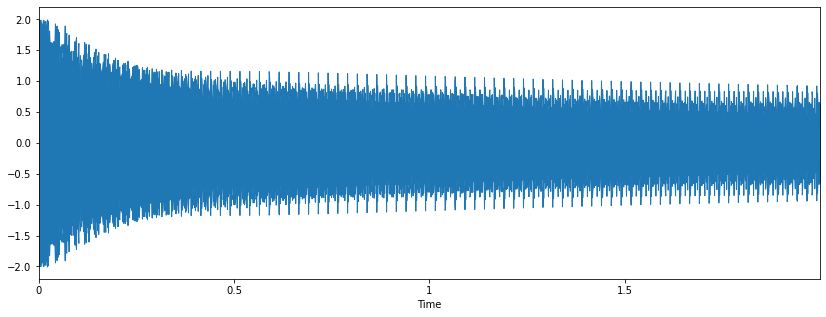

In [491]:
# Попробуйте покрутить параметры генерации. 
# YOUR CODE HERE
frequency2 = 40
noise2 = (2 * np.random.uniform(-1, 1, int(sample_rate / frequency2))) # [-1, 1]
gen_wav2 = karplus_strong(noise2, gen_len)
init_audio_player(gen_wav2, sample_rate)